In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040253.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.254902  0.282353  0.317647  0.364706  0.415686  0.462745  0.505882   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.552941  0.603922  0.647059  ...  0.643137  0.631373  0.615686  0.603922   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.592157  0.576471  0.556863  0.541176    110.301471      53.779412  

[1 rows x 4202 columns]
[110.30147059]  /  [53.77941176]
          0         1         2         3         4         5         6  \
0  0.254902  0.282353  0.317647  0.364706  0.415686  0.462745  0.505882   

          7         8         9  ...      4190     4191      4192      4193  \
0  0.552941  0.603922  0.647059  ...  0.658824  0.65098  0.643137  0.631373   

       4194      4195      4196      4197      4198      4199  
0  0.615686  0.603922  0.592157  0.576471  0.556863  0.541176  

[1 rows x 4200 columns]


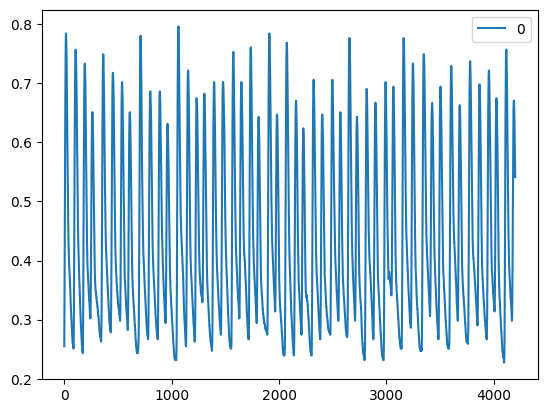

In [243]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [244]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

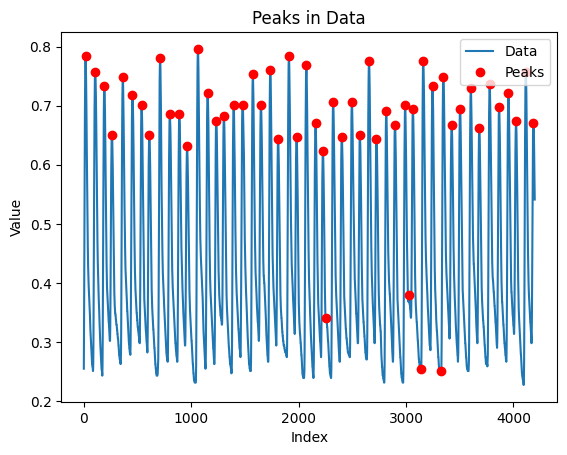

{'indices': array([  16,  106,  191,  261,  363,  453,  538,  610,  710,  801,  889,
        962, 1063, 1153, 1232, 1304, 1395, 1478, 1574, 1649, 1736, 1810,
       1910, 1981, 2072, 2158, 2226, 2257, 2322, 2402, 2496, 2571, 2656,
       2725, 2816, 2897, 2992, 3024, 3064, 3136, 3160, 3247, 3324, 3348,
       3425, 3504, 3604, 3682, 3779, 3867, 3954, 4025, 4116, 4187]), 'values': array([0.78431373, 0.75686275, 0.73333333, 0.65098039, 0.74901961,
       0.71764706, 0.70196078, 0.65098039, 0.78039216, 0.68627451,
       0.68627451, 0.63137255, 0.79607843, 0.72156863, 0.6745098 ,
       0.68235294, 0.70196078, 0.70196078, 0.75294118, 0.70196078,
       0.76078431, 0.64313725, 0.78431373, 0.64705882, 0.76862745,
       0.67058824, 0.62352941, 0.34117647, 0.70588235, 0.64705882,
       0.70588235, 0.65098039, 0.77647059, 0.64313725, 0.69019608,
       0.66666667, 0.70196078, 0.38039216, 0.69411765, 0.25490196,
       0.77647059, 0.73333333, 0.25098039, 0.74901961, 0.66666667,
       0.69411

In [245]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [246]:
def split_values_high_low(filtered_df, threshold=0.5):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[0.7843137254901961, 0.7568627450980392, 0.7333333333333333, 0.6509803921568628, 0.7490196078431373, 0.7176470588235294, 0.7019607843137254, 0.6509803921568628, 0.7803921568627451, 0.6862745098039216, 0.6862745098039216, 0.6313725490196078, 0.796078431372549, 0.7215686274509804, 0.6745098039215687, 0.6823529411764706, 0.7019607843137254, 0.7019607843137254, 0.7529411764705882, 0.7019607843137254, 0.7607843137254902, 0.6431372549019608, 0.7843137254901961, 0.6470588235294118, 0.7686274509803922, 0.6705882352941176, 0.6235294117647059, None, 0.7058823529411765, 0.6470588235294118, 0.7058823529411765, 0.6509803921568628, 0.7764705882352941, 0.6431372549019608, 0.6901960784313725, 0.6666666666666666, 0.7019607843137254, None, 0.6941176470588235, None, 0.7764705882352941, 0.7333333333333333, None, 0.7490196078431373, 0.6666666666666666, 0.6941176470588235, 0.7294117647058823, 0.6627450980392157, 0.7372549019607844, 0.6980392156862745, 0.7215686274509804, 0.6745098039215687, 0.75686274509803

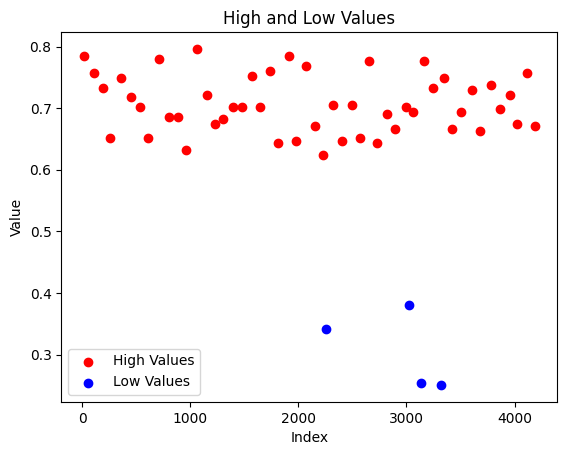

In [247]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [248]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7062745098039216
Average Low Value: 0.3068627450980392
